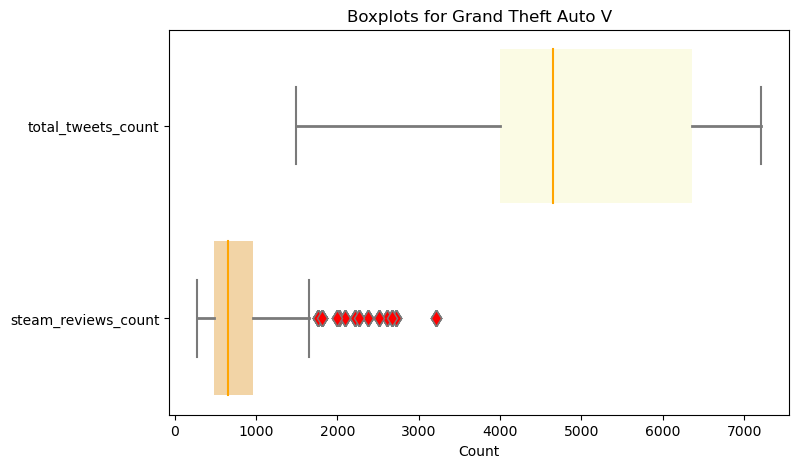

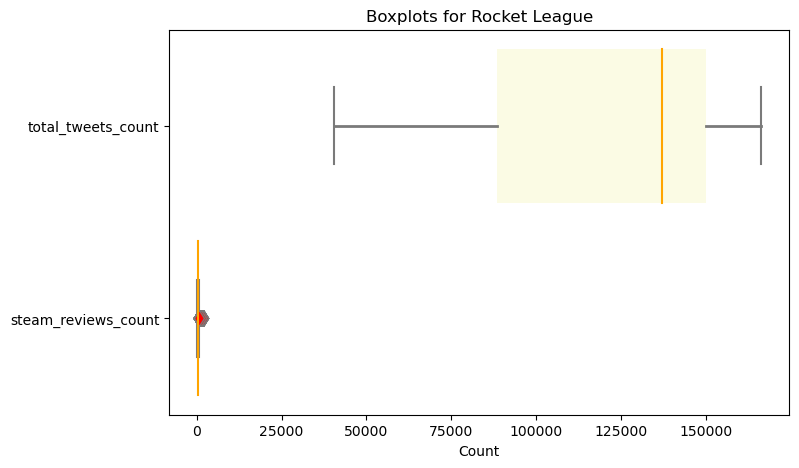

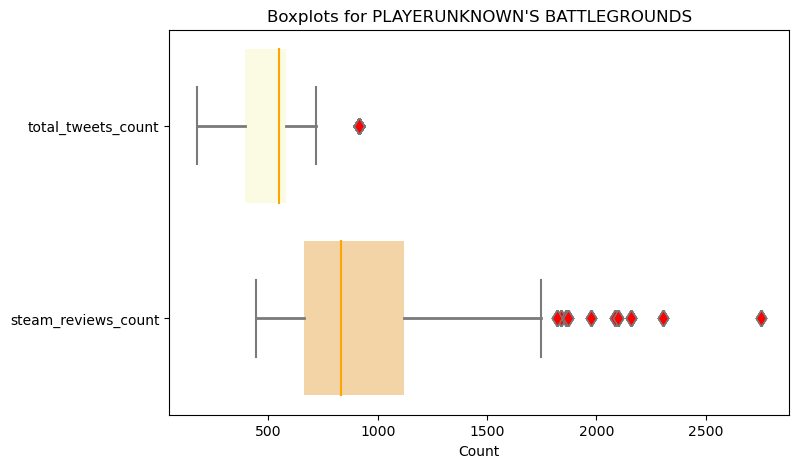

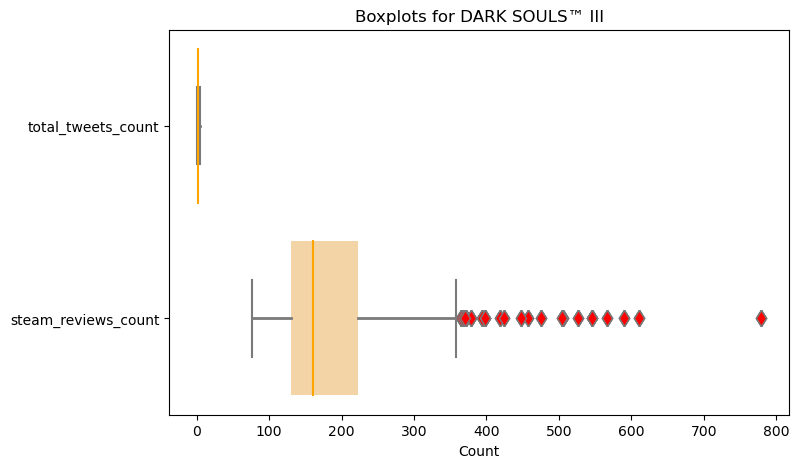

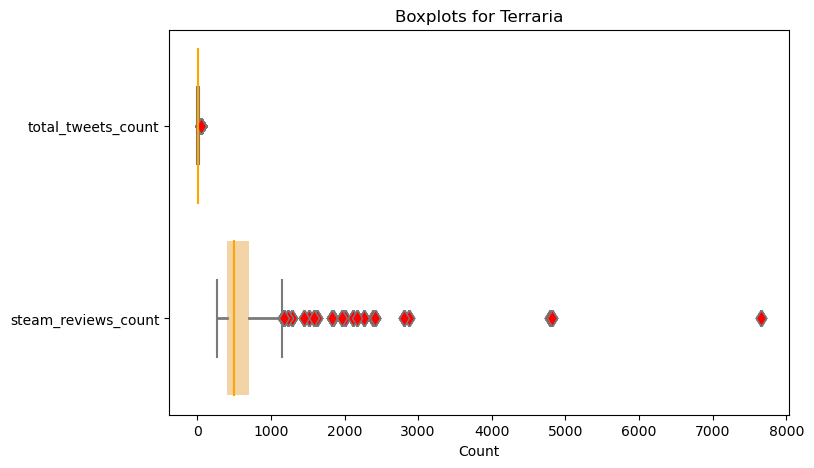

In [13]:
# tweets data from total_tweets.py
# with PATH = "../s2465795/project_data/twitter/2020/01/0*/*/*.json.bz2"
# steam data from total_steam_review.py
# with PATH = "../s2465795/project_data/steam_reviews.csv"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into Pandas DataFrames
total_tweets_df = pd.read_csv('Desktop/DataScienceAndTechnologies/tweets.csv')
steam_reviews_df = pd.read_csv('Desktop/DataScienceAndTechnologies/steam.csv')

# Iterate through unique game or app names and create separate boxplots
for name in total_tweets_df['game_name'].unique():
    # Filter data for the specific game or app
    subset_df = total_tweets_df[total_tweets_df['game_name'] == name]
    
    # Merge with steam_reviews_df based on app_name or game_name
    merged_df = pd.merge(subset_df, steam_reviews_df, left_on='game_name', right_on='app_name', how='inner')
    
    # Drop unnecessary columns
    merged_df = merged_df[['date', 'game_name', 'count_x', 'count_y']]
    
    # Rename columns for clarity
    merged_df = merged_df.rename(columns={'count_x': 'total_tweets_count', 'count_y': 'steam_reviews_count'})
    
    # Create a boxplot using Seaborn with custom colors
    plt.figure(figsize=(8, 5))

# Set custom colors for each box
    sns.boxplot(data=merged_df[['total_tweets_count', 'steam_reviews_count']], orient='h',
                palette={'total_tweets_count': 'lightyellow', 'steam_reviews_count': '#FFD699'},
                flierprops=dict(markerfacecolor='red', markersize=8),
                boxprops=dict(linewidth=0),  # No outline
                whiskerprops=dict(linewidth=2),  # whisker color and thickness
                medianprops=dict(color='orange'))  # median line color
    
    plt.title(f'Boxplots for {name}')
    plt.xlabel('Count')
    #plt.grid(True, linestyle='--', alpha=0.7, color='black')
    plt.show()
